# TO DO

- **question4 :** Try LR
- **challenge Q:** issues with the plot of topsports in both states. some values are assigning to the wrong labels when plotted
- Trying to get sns cat plot to plot bars side by side
- **read me**
usually put an expanation that we cannot provide in the code. In the code we will have dataframes / attributes. Good to explain what those are. do not put the analysis or the results n the code. Can put the explanation of why a function was used. 
- CLEAN UP NOTEBOOK, AT MMARKDOWN COMMENTS

# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any electorates over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


In [4]:
seifa[seifa['LGA'] == 'ONKAPARINGA']

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
1392,45340,Onkaparinga (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,975,ONKAPARINGA
1393,45340,Onkaparinga (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,672,ONKAPARINGA
1394,45340,Onkaparinga (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1152,ONKAPARINGA
1395,45340,Onkaparinga (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,159517,ONKAPARINGA
3648,45340,Onkaparinga (C),IRSD,Index of Relative Socio-economic Disadvantage,SCORE,Score,993,ONKAPARINGA
3649,45340,Onkaparinga (C),IRSD,Index of Relative Socio-economic Disadvantage,MINS,Minimum score for SA1s in area,637,ONKAPARINGA
3650,45340,Onkaparinga (C),IRSD,Index of Relative Socio-economic Disadvantage,MAXS,Maximum score for SA1s in area,1141,ONKAPARINGA
3651,45340,Onkaparinga (C),IRSD,Index of Relative Socio-economic Disadvantage,URP,Usual resident population,159517,ONKAPARINGA
5904,45340,Onkaparinga (C),IER,Index of Economic Resources,SCORE,Score,996,ONKAPARINGA
5905,45340,Onkaparinga (C),IER,Index of Economic Resources,MINS,Minimum score for SA1s in area,674,ONKAPARINGA


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [5]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0
ALBANY,999.0,999.0,977.0,987.0
ALBURY,964.0,964.0,967.0,979.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0


In [6]:
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_pop.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,19606.0,19606.0,19606.0,19606.0
ADELAIDE HILLS,38601.0,38601.0,38601.0,38601.0
ALBANY,33614.0,33614.0,33614.0,33614.0
ALBURY,47851.0,47851.0,47851.0,47851.0
ALEXANDRINA,23693.0,23693.0,23693.0,23693.0


In [7]:
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [8]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


We can use the `.describe()` function to get a general idea of what the dataframe looks like

In [9]:
sa_vouchers_scores.describe()

,Participant_ID,Voucher_Value,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
count,1.275260e+05,127526.000000,127526.000000,118066.000000,118066.000000,118066.000000,118066.000000,118066.000000
mean,1.063764e+06,49.663951,2015.915100,981.049942,981.049942,971.090416,981.756314,68014.296046
std,3.681374e+04,2.700970,0.765087,44.454505,44.454505,56.889280,55.538098,50470.140017
min,1.000002e+06,5.000000,2015.000000,870.000000,870.000000,808.000000,798.000000,871.000000
25%,1.031883e+06,50.000000,2015.000000,955.000000,955.000000,927.000000,937.000000,22070.000000
50%,1.063764e+06,50.000000,2016.000000,974.000000,974.000000,973.000000,987.000000,62912.000000
75%,1.095646e+06,50.000000,2017.000000,1013.000000,1013.000000,997.000000,1018.000000,104922.000000
max,1.127526e+06,50.000000,2017.000000,1083.000000,1083.000000,1090.000000,1096.000000,159517.000000


Removing any uppercase words for ease of referencing the DF.

help from https://www.codegrepper.com/code-examples/python/convert+columns+to+lowercase+pandas

In [10]:
LGA_scores.index = LGA_scores.index.str.lower()

sa_vouchers.columns = sa_vouchers.columns.str.lower()

sa_vouchers_scores.columns = sa_vouchers_scores.columns.str.lower()

seifa.columns = seifa.columns.str.lower()

sa_vouchers.columns = sa_vouchers.columns.str.lower()

LGA_scores.columns = LGA_scores.columns.str.lower()

# Index Definition

From here https://www.abs.gov.au/ausstats/abs@.nsf/Lookup/by%20Subject/2033.0.55.001~2016~Main%20Features~IRSAD~20

4 major indexes for every LGA. 

**IRSAD: index of relative socio economic advantage and disadvantage.**
- summarises information about the economic and social conditions of people and households within an area. Includes both relative advantage and disadvantage. 
- low score = greater disadvatange, lack of advantage in general. 
- low scores = many households with low incomes, many people in unskilled occupations. OR few households with high incomes. Few people in skilled occupations. 

**IEO: Index of education and occupation.**
- reflects the educational and occupational level of communities. 
- Education variables in this index show either the level of qualification achieved or wheteher further education is being undertaken. 
- Low score = relatively lower education and occupation status. 
- low score = many people without qualifications or many people in low skilled occuaptions or unemployed. AND few people with high level of qualification or highly skilled occupation. 

**IER: Index of economic resources.**
- focus' on the financial aspects of relative socio-economic advantage and disadvantage. Summarises variables related to income and wealth. 
- low score = relative lack to economic resources in general. 
- low score = many households with low income, or many paying low rent. AND few households with high income, or few owned homes. 

**IRSD: The index of relative socio economic disadvantage.**
- range of information about the economic and social conditions of people and households. 
- low score = relatively greater disadvantage in general. 
- low sore= many households with low income, people with no qualification OR many people in low skill occupations. 

**Local Government Areas - 2011** 
- Cities (C)
- Rural Cities (RC)
- Municipalities/Municipal Councils (M)
- District Councils (DC)
- Regional Councils (RegC)
- Towns (T)
- Aboriginal Councils (AC)

# Question 1

 Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?

### setting up the DFs

We know each row means a voucher has been claimed. 

Start off by checking how many unique LGAs there are. Then we can count how many times the LGA occurs. 

In [11]:
len(set(sa_vouchers_scores['participant_lga']))

69

It's quite difficult to use this type of dataframe due to the multi index. We can use `pivot` instead to make it more clear. 

Used help from the textbook for this part. Page 24, section 2.6.8



In [12]:
group = (sa_vouchers_scores.groupby(['participant_lga','voucher_sport']).count()).copy(deep=True)

In [13]:
group.head()

participant_id  participant_suburb  \
participant_lga voucher_sport                                          
ADELAIDE        Athletics                     16                  16   
                Australian Rules             130                 130   
                Baseball                       1                   1   
                Basketball                     4                   4   
                Calisthenics                   1                   1   

                                  club_previous_member  \
participant_lga voucher_sport                            
ADELAIDE        Athletics                           16   
                Australian Rules                   130   
                Baseball                             1   
                Basketball                           4   
                Calisthenics                         1   

                                  participant_atsi_indicator  \
participant_lga voucher_sport                                  
ADELAIDE        Athletics                                 16   
                Australian Rules                         130   
                Baseball                                   1   
                Basketball                                 4   
                Calisthenics                               1   

                                  participant_cald_indicator  participant_sex  \
participant_lga voucher_sport                                                   
ADELAIDE        Athletics                                 16               16   
                Australian Rules                         130              130   
                Baseball                                   1                1   
                Basketball                                 4                4   
                Calisthenics                               1                1   

                                  voucher_value  club_name  \
participant_lga voucher_sport                                
ADELAIDE        Athletics                    16         16   
                Australian Rules            130        130   
                Baseball                      1          1   
                Basketball                    4          4   
                Calisthenics                  1          1   

                                  participant_electorate  \
participant_lga voucher_sport                              
ADELAIDE        Athletics                             16   
                Australian Rules                     130   
                Baseball                               1   
                Basketball                             4   
                Calisthenics                           1   

                                  voucher_completion_date  voucher_claim_year  \
participant_lga voucher_sport                                                   
ADELAIDE        Athletics                              16                  16   
                Australian Rules                      128                 130   
                Baseball                                1                   1   
                Basketball                              4                   4   
                Calisthenics                            1                   1   

                                  ieo  ier  irsad  irsd  population  
participant_lga voucher_sport                                        
ADELAIDE        Athletics          16   16     16    16          16  
                Australian Rules  130  130    130   130         130  
                Baseball            1    1      1     1           1  
                Basketball          4    4      4     4           4  
                Calisthenics        1    1      1     1           1

keeping all rows and only keeping one column. All the columns represent the same number of counts, so we only need to keep one. 

In [14]:
saSports = pd.pivot_table(group, values = 'participant_id', index = 'participant_lga', columns = 'voucher_sport')

In [15]:
saSports.head()

voucher_sport,Archery,Athletics,Australian Rules,BMX,Badminton,Baseball,Basketball,Bowls,Calisthenics,Cricket,...,Surf Riding,Swimming,Table Tennis,Taekwondo,Tennis,Touch,Volleyball,Water Polo,Weightlifting,Wrestling
participant_lga,,,,,,,,,,,,,,,,,,,,,
ADELAIDE,NaN,16.0,130.0,NaN,NaN,1.0,4.0,NaN,1.0,2.0,...,NaN,NaN,NaN,11.0,4.0,NaN,NaN,NaN,NaN,NaN
ADELAIDE HILLS,3.0,204.0,1412.0,2.0,NaN,11.0,48.0,NaN,62.0,128.0,...,NaN,18.0,3.0,44.0,257.0,2.0,1.0,1.0,NaN,NaN
ADELAIDE PLAINS,NaN,3.0,485.0,NaN,NaN,3.0,15.0,NaN,23.0,3.0,...,NaN,3.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN
ALEXANDRINA,9.0,62.0,980.0,4.0,3.0,NaN,204.0,NaN,5.0,8.0,...,2.0,11.0,NaN,NaN,109.0,NaN,NaN,NaN,NaN,NaN
BAROSSA,NaN,158.0,1196.0,3.0,NaN,6.0,341.0,NaN,9.0,56.0,...,NaN,12.0,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN


In [16]:
saSports = saSports.fillna(0)

Applying the pivot table has drastically aided in the dimensioniality of the DF,m making it easier to explore the DF. I have also changed the NAN values to zero, making the assumption that the nan values represent no voucher redeemed. 

Let's try some plots with this new df now. 

In [17]:
saSports.index = saSports.index.str.lower()
saSports.columns = saSports.columns.str.lower()

### normallising

We want to find out the proportion of vouchers claimed per suburb. this will involve dividing the total vouchers claimed in the LGA by the total vouchers claimed in the state. 

Because the least popular sports don't have many claims, it would be justifiable to not inclue it in the rest of the analysis for this part. Plotting the least popular sports wouldn't yield much information. We can determine the least popular sports. 

When comparing LGAs, it would be better to normalise by each of their popuulations. BEcause comparing one LGA which might have a large population won't be a fair comparison. The othe option would be to normalise the population of the LGA to the population of the entire state. Although The LGAs with the highest population swould saturate the data. 

If we don't know how the vouchers were distributed, better to normalise with respect to the total vouchers claimed rather than by the population because there could be 2 vouchers per person. 

We want
- the total number of vouchers claimed for all LGAs combined. 
- how the total of vouchers claimed for a specific sport compares to the total claimed
- what does this tell us? 

We know the total number of vouchers clamed is the number of rows in sa_vouchers_scores, as each row represents a claimed voucher.

The total vouchers claimed for all sports:

In [18]:
claimDF = saSports.sum().to_frame(name='sum')

The proportion of vouchers claimed for each sport to the total vouchers claimed.

In [19]:
claimDF['proportion'] =claimDF['sum'] / claimDF.sum()[0]


checking the mean of the proportion alllows us to see an upper vs lower half of the sports claim rate

In [20]:
round(claimDF['proportion'].mean(), 2)

0.02

The mean claim rate for all the sports is 2%. This means there are alot of sports with a very low claim rate, and very few sports with a high claim rate. We can check how many sports are above and below the mean:

In [21]:
print(f'There are {len(claimDF[claimDF["proportion"] >claimDF["proportion"].mean()])} sports with claim rate above the mean of 2%')

There are 8 sports with claim rate above the mean of 2%


In [22]:
print(f'There are {len(claimDF[claimDF["proportion"]<claimDF["proportion"].mean()])} sports with claim rate above the mean of 2%')

There are 42 sports with claim rate above the mean of 2%


determining the most popular and least popular sports

In [23]:
topSports = list(claimDF['proportion'].nlargest(5).index)

In [24]:
botSports = list(claimDF['proportion'].nsmallest(5).index)

Plotting the proportions of these sports

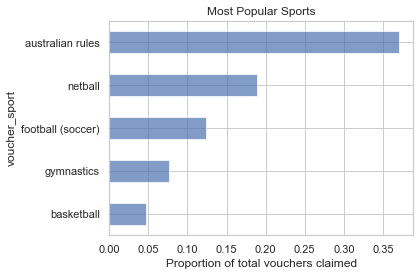

In [25]:
sns.set_theme(style="whitegrid")
fig, axes= plt.subplots(1,1)


claimDF['proportion'][topSports].sort_values().plot(kind='barh', style='b', alpha=0.7,
              title='Most Popular Sports')

plt.xlabel('Proportion of total vouchers claimed')
plt.tight_layout()
plt.show()

Least popular sports have been excluded as there are not many claims. Instead, let's group them as an 'other' sport along with all the other sports that are not included in `topSports`

In [26]:
topSportsDF= claimDF.loc[topSports]

Storing all the other sports that are not included in `topSports`

In [27]:
otherSportsDF = claimDF.loc[~claimDF.index.isin(topSports)].sum(axis=0).to_frame().T

Putting the other sports and top sports in a single DF

In [28]:
sportsClaim = pd.concat([topSportsDF, otherSportsDF])

In [29]:
sportsClaim = sportsClaim.rename(index={0:'other'})

In [30]:
sportsClaim['percentage'] = round(sportsClaim['proportion']*100, 2)

In [31]:
sportsClaim

,sum,proportion,percentage
australian rules,47224.0,0.370309,37.03
netball,24017.0,0.188330,18.83
football (soccer),15775.0,0.123700,12.37
gymnastics,9823.0,0.077027,7.70
basketball,6016.0,0.047175,4.72
other,24671.0,0.193459,19.35


Checking the sum of all the sports comes to 100%

In [32]:
sportsClaim['percentage'].sum()

100.0

Plotting again, this time with the other sports

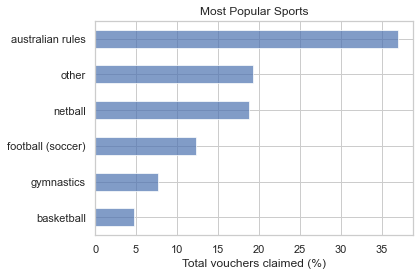

In [33]:
sns.set_theme(style="whitegrid")
fig, axes= plt.subplots(1,1)


sportsClaim['percentage'].sort_values().plot(kind='barh', style='b', alpha=0.7,
              title='Most Popular Sports')

plt.xlabel('Total vouchers claimed (%)')

plt.tight_layout()
plt.show()

We can see Australian Rules and Netball are the most popular, badminton being the least popular found in botSports. We expect this as we know most South Australians play these popular sports growing up. Other factors that can be included may be the regions in which these sports are played. Some LGAs may have a higher voucher claim rate for a less popular sport than others. We were able to show the most popular sports across all LGAs, though there may be some LGAs where these top sports are not popular. 

Checking the proportion of vouchers claimed in the top LGAs:

### Normalising in each LGA

In [34]:
lgaClaim = saSports.sum(axis=1).to_frame(name='sum')

In [35]:
lgaClaim['population'] = LGA_scores['population']

In [36]:
NANpopulation = list(lgaClaim[lgaClaim['population'].isna()].index)

We can drop the `NANpopulation` from the DF because it is only a small number of vouchers (approx. 600) compared to the total vouchers (approx. 130000). We want to drop the NANpopulation because these represent LGAs that were originally in the sa_vouchers DF but not in the seifa DF. 

Dropping NANpopulation should not have an adverse effect on the rest of the data.  

In [37]:
lgaClaim = lgaClaim.drop(NANpopulation)

Normalising the total claims per LGA by the population of the LGA.

In [38]:
lgaClaim['proportion'] = lgaClaim['sum']/ lgaClaim['population']

In [39]:
lgaClaim.head()

,sum,population,proportion
participant_lga,,,
adelaide,302.0,19606.0,0.015403
adelaide hills,4756.0,38601.0,0.123209
alexandrina,2979.0,23693.0,0.125733
barossa,2874.0,22174.0,0.129611
barunga west,333.0,2467.0,0.134982


In [40]:
lgaClaim['proportion'].nlargest(5)

participant_lga
karoonda east murray    0.374879
kimba                   0.213431
wudinna                 0.212580
cleve                   0.190283
southern mallee         0.163090
Name: proportion, dtype: float64

Storing these LGAs in a list to access them later

In [41]:
topLGAs = list(lgaClaim['proportion'].nlargest(5).index)

In [42]:
lgaClaim['percentage'] = round(lgaClaim['proportion']*100,2)

In [43]:
lgaClaim.head()

,sum,population,proportion,percentage
participant_lga,,,,
adelaide,302.0,19606.0,0.015403,1.54
adelaide hills,4756.0,38601.0,0.123209,12.32
alexandrina,2979.0,23693.0,0.125733,12.57
barossa,2874.0,22174.0,0.129611,12.96
barunga west,333.0,2467.0,0.134982,13.50


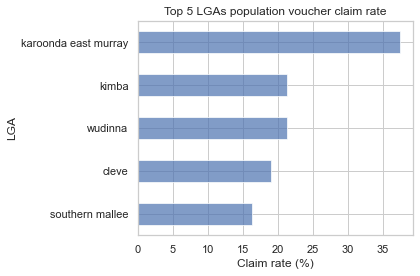

In [44]:
sns.set_theme(style="whitegrid")
fig, axes= plt.subplots(1,1)


ax = lgaClaim.loc[topLGAs]['percentage'].sort_values().plot(kind='barh', style='b', alpha=0.7,
              title='Top 5 LGAs population voucher claim rate')


ax.set(ylabel= 'LGA')

plt.xlabel('Claim rate (%)')

plt.tight_layout()
plt.show()

37.5% of the population in Karoonda east murray has claimed a voucher. The proportion is significantly higher compared to the other `topLGAs`, though it's population is also very small. What could cause a town with a small population to have such a high claim rate? We will explore this in later questions. We saw in the DF `lgaClaim` that this LGA only had a total of 388 vouchers claimed. Below we will see the majority of the claims are in the topSports list. 

In [45]:
saSports.loc['karoonda east murray'].sort_values(ascending=False)[topSports]

voucher_sport
australian rules     169.0
netball              100.0
football (soccer)     18.0
gymnastics            22.0
basketball             7.0
Name: karoonda east murray, dtype: float64

### Checking the contributions of proportions per top LGA and 'other' LGAs for Australian Rules

Getting the top 10 LGAs claims and normalising them.

In [46]:
topLGAs2 = list(saSports['australian rules'].nlargest(10).index)

In [47]:
otherSports2DF = saSports['australian rules'].loc[~saSports.index.isin(topLGAs2)].to_frame()

In [48]:
otherSports2DF['proportion'] =(otherSports2DF['australian rules'] / saSports['australian rules'].sum())

In [49]:
aflTop = saSports['australian rules'].loc[topLGAs2].to_frame()

In [50]:
aflTop['proportion'] = aflTop['australian rules'] / saSports['australian rules'].sum()

In [51]:
aflTop = aflTop.T

In [52]:
aflTop['other'] = otherSports2DF.sum()

<Figure size 1080x360 with 0 Axes>

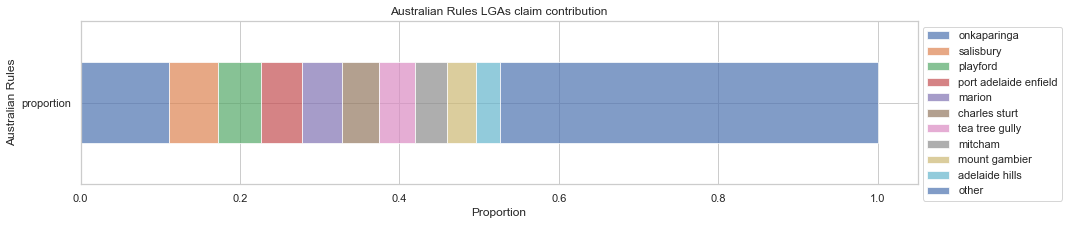

In [53]:
sns.set_theme(style="whitegrid")
# fig = plt.figsize=(12, 5)
plt.figure(figsize=(15,5))

ax = aflTop.drop(index='australian rules').plot(kind = 'barh',stacked=True,style='b', 
                    alpha=0.7,title='Australian Rules LGAs claim contribution', figsize=(15,3))


plt.legend(bbox_to_anchor=(1, 1))
ax.set(ylabel='Australian Rules', xlabel = 'Proportion')

plt.show()

Onkaparinga has the highest contribution to the total vouchers claimed for Australian rules. These top 10 sports cover nearly half the amount of total vouchers claimed for this sport. The other half represents all other LGAs, totalling 40 additional LGAs. Considering these 10 LGAs, we can explore why they may have the highest contributions using features from the `LGA_scores` (seifa) DF. Though this will be done in later questions.

# Question 2

Are some sports more popular in different parts of the state?

To check what types of sports are popular in different parts of the state: 

- what sports are most popular for each LGA 
- can check the proportion of the top sports in each LGA, this will show how they won't be the same shape. That is aussie rules might be less popular in one compared to gymnastics

### Checking the top 5 LGAs claims of each the top sport, normalised by the LGAs population

Getting the top 5 LGAs for each sport in `topSports` with only the total vouchers claimed. Will do the same for normalised LGAs, that is, getting the top 5 LGAs with the highest claim rates for the top sports.

In [54]:
netball = saSports['netball'].sort_values().nlargest(5)
gymnastics =saSports['gymnastics'].sort_values().nlargest(5)
soccer= saSports['football (soccer)'].sort_values().nlargest(5)
afl= saSports['australian rules'].sort_values().nlargest(5)
basketball = saSports['basketball'].sort_values().nlargest(5)

In [55]:
list1 = list(netball.index.values)
list2 = list(gymnastics.index.values)
list3 = list(soccer.index.values)
list4 = list(afl.index.values)
list5 = list(basketball.index.values)

# mylist = list1.concatenate([list2, list3, list4, list5])

In [56]:
topSports_topLGAsList = list(set(np.concatenate([list1, list2,list3,list4,list5])))

In [57]:
topClaims = saSports[topSports].loc[set(topSports_topLGAsList)]
topClaims

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball
participant_lga,,,,,
naracoorte lucindale,257.0,165.0,57.0,0.0,364.0
marion,2362.0,723.0,203.0,719.0,101.0
port augusta,119.0,765.0,111.0,10.0,364.0
tea tree gully,2131.0,1068.0,1356.0,1114.0,284.0
whyalla,569.0,509.0,268.0,154.0,605.0
onkaparinga,5258.0,2242.0,1204.0,1211.0,296.0
mount barker,1230.0,880.0,333.0,294.0,147.0
barossa,1196.0,445.0,197.0,117.0,341.0
charles sturt,2147.0,584.0,917.0,807.0,256.0


In [58]:
topClaims['population'] = LGA_scores['population']

In [59]:
topClaims['total'] = saSports.sum(axis=1) / topClaims['population']

In [60]:
topClaims['other'] = saSports.loc[:, ~saSports.columns.isin(topSports)].sum(axis=1).to_frame()

help with `.apply()` from https://appdividend.com/2020/03/05/python-pandas-how-to-apply-formula-to-entire-column-and-row/

In [61]:
newDF = topClaims.apply(lambda a: a/topClaims['population'] )[topSports]

In [62]:
topClaims[topSports] = newDF[topSports]

In [63]:
topClaims['other'] = topClaims['other'] / topClaims['population']

In [64]:
columnsList = list(['australian rules','netball','football (soccer)','gymnastics','basketball','other','total','population'])

rearranging the order of the columns. Specifically, changng the order of the last three columns. 

In [65]:
columnsList = list(topClaims.columns[:-3])

In [66]:
columnsList.extend(['other','total','population'])

In [67]:
topClaims = topClaims.reindex(columns = columnsList)

Checking to see the total column is correct. Essentially checking the entire process we've done to topClaims was done correctly.

The False value represents the NANs in the DF. We will remove them because they do not exist in the `LGA_scores` DF

In [68]:
round(topClaims[topSports].sum(axis=1) + topClaims['other'], 2) == round(topClaims['total'],2)

participant_lga
naracoorte lucindale     False
marion                    True
port augusta              True
tea tree gully            True
whyalla                   True
onkaparinga               True
mount barker              True
barossa                   True
charles sturt             True
adelaide hills            True
playford                  True
port adelaide enfield     True
salisbury                 True
dtype: bool

In [69]:
topClaims = topClaims.drop(['population'], axis=1)

In [70]:
topClaims = topClaims.dropna()

We can see now therer are no more NAN values

In [71]:
set(round(topClaims[topSports].sum(axis=1) + topClaims['other'], 2) == round(topClaims['total'],2))

{True}

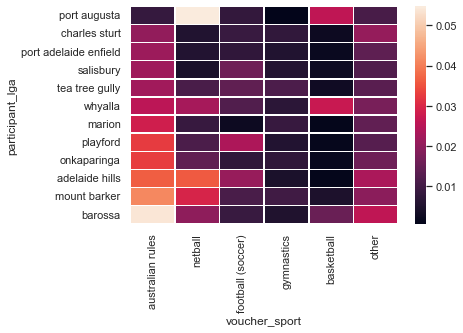

In [72]:
sns.heatmap(data= topClaims.drop(columns='total').sort_values(by= 'australian rules'), linewidths = 0.5)

from this, we can see that even though the topSports are most popular, there arre still instances when the other sports have quite a high claim rate. Austrralian rules is not popullar in port augusta, but netball and basketball are. We also see that in charles sturt, the other sports are as popular as australan rules. 

A better representation of the above heatmap would be wiith a stacked bar plot. 

In [73]:
topClaims.drop(columns='total').sort_values(by= 'australian rules', ascending = False)

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other
participant_lga,,,,,,
barossa,0.053937,0.020069,0.008884,0.005276,0.015378,0.026067
mount barker,0.041267,0.029524,0.011172,0.009864,0.004932,0.019627
adelaide hills,0.036579,0.036139,0.021036,0.004559,0.001243,0.023652
onkaparinga,0.032962,0.014055,0.007548,0.007592,0.001856,0.016117
playford,0.032624,0.011431,0.023773,0.005703,0.001404,0.012822
marion,0.028456,0.008710,0.002446,0.008662,0.001217,0.014252
whyalla,0.025782,0.023063,0.012143,0.006978,0.027413,0.017354
tea tree gully,0.022323,0.011188,0.014205,0.011670,0.002975,0.013262
salisbury,0.022128,0.004385,0.016030,0.005912,0.002805,0.012033


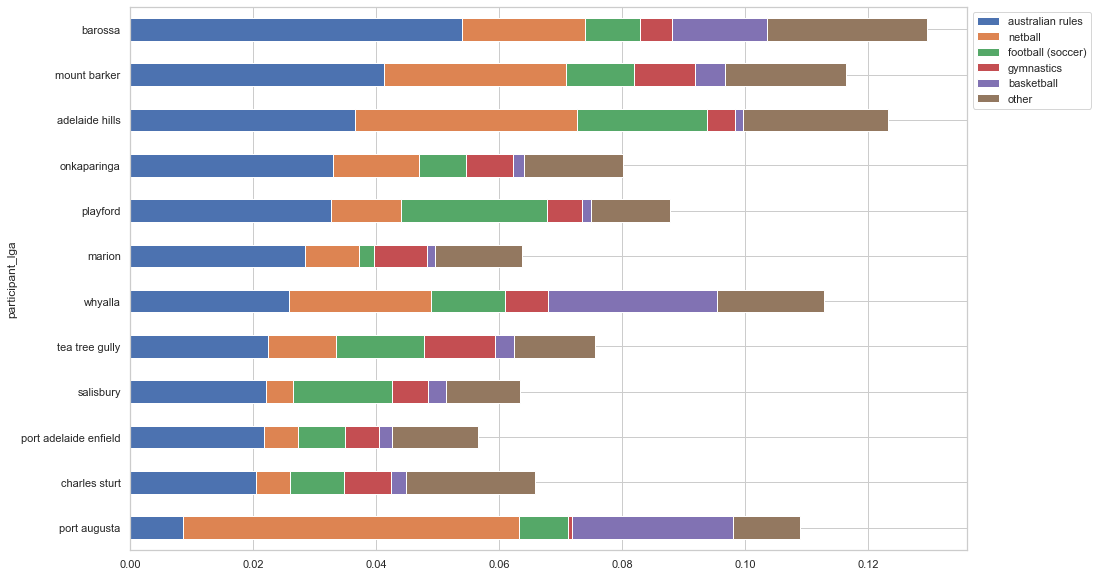

In [74]:
# plt.figure(figsize=(15,10))
plt.rcParams["figure.figsize"] = [15, 10]


topClaims.drop(columns='total').sort_values(by= 'australian rules').plot.barh(stacked=True)

plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Harder to see some sports, it would be better if this could be from 0 to 1 instead of the max value of the LGAs with the highest claim rates. It would be unwise to plot it like this though because we have normalised with the population of the LGA. So we may have up to 10% of the bar being the claims, but then the remaining 90% would be the population that did not claim. 

Let's check the proportions when we normalise with the LGAs total claims. 

### Checking the top 5 LGAs of each top sport, normalised with the total claims in the LGA.

In [75]:
netball = list((saSports['netball']/ saSports.sum(axis=1)).nlargest(5).index)
gymnastics = list((saSports['gymnastics']/ saSports.sum(axis=1)).nlargest(5).index)
soccer= list((saSports['football (soccer)']/ saSports.sum(axis=1)).nlargest(5).index)
afl= list((saSports['australian rules']/ saSports.sum(axis=1)).nlargest(5).index)
basketball = list((saSports['basketball']/ saSports.sum(axis=1)).nlargest(5).index)

In [76]:
topSports_topLGAsList2 = list(set(np.concatenate([netball, gymnastics,soccer,afl,basketball])))

In [77]:
topClaims = saSports[topSports].loc[set(topSports_topLGAsList2)]

In [78]:
topClaims.head()

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball
participant_lga,,,,,
naracoorte lucindale,257.0,165.0,57.0,0.0,364.0
tumby bay,189.0,59.0,6.0,4.0,0.0
flinders ranges,9.0,61.0,1.0,1.0,7.0
marion,2362.0,723.0,203.0,719.0,101.0
tea tree gully,2131.0,1068.0,1356.0,1114.0,284.0


Storing all the sports that are not topSports as 'other' sports

In [79]:
topClaims['other'] = saSports.loc[:, ~saSports.columns.isin(topSports)].sum(axis=1).to_frame()

Determining the total voucher claims of all the sports per LGA.

In [80]:
topClaims['total'] = topClaims.sum(axis=1)

In [81]:
topClaims.head()

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
naracoorte lucindale,257.0,165.0,57.0,0.0,364.0,254.0,1097.0
tumby bay,189.0,59.0,6.0,4.0,0.0,36.0,294.0
flinders ranges,9.0,61.0,1.0,1.0,7.0,23.0,102.0
marion,2362.0,723.0,203.0,719.0,101.0,1183.0,5291.0
tea tree gully,2131.0,1068.0,1356.0,1114.0,284.0,1266.0,7219.0


Normalising the sports

In [82]:
topClaims = topClaims.apply(lambda a: a/topClaims['total'] )

In [83]:
topClaims.head()

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
naracoorte lucindale,0.234275,0.150410,0.051960,0.000000,0.331814,0.231541,1.0
tumby bay,0.642857,0.200680,0.020408,0.013605,0.000000,0.122449,1.0
flinders ranges,0.088235,0.598039,0.009804,0.009804,0.068627,0.225490,1.0
marion,0.446418,0.136647,0.038367,0.135891,0.019089,0.223587,1.0
tea tree gully,0.295193,0.147943,0.187838,0.154315,0.039341,0.175371,1.0


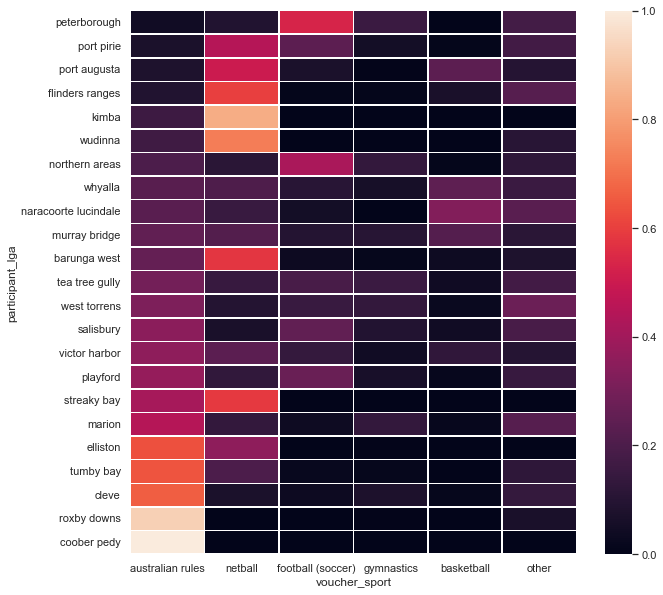

In [84]:
plt.figure(figsize=(10,10))

sns.heatmap(data= topClaims.drop(columns='total').sort_values(by= 'australian rules'), linewidths = 0.5)

We can almost see a pattern that as Australian Rules decreses in popularity over the LGAs, Netball increases. Let's plot this as a stacked bar chart.

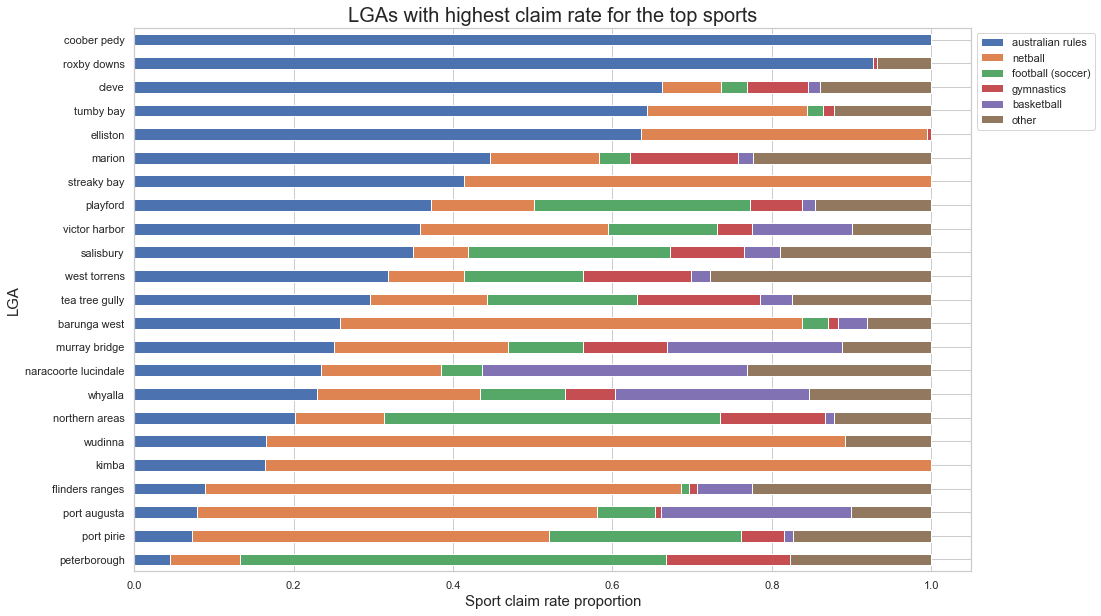

In [85]:
# plt.figure(figsize=(15,10))
plt.rcParams["figure.figsize"] = [15, 10]


topClaims.drop(columns='total').sort_values('australian rules').plot.barh(stacked=True)

plt.legend(bbox_to_anchor=(1, 1))

plt.title('LGAs with highest claim rate for the top sports', size = 20)
plt.xlabel('Sport claim rate proportion', size = 15)
plt.ylabel('LGA', size=15)

plt.show()

Although there is a lot of information in this plot, we can see that as the popularity in one sport decreases, the popularity in another sport increases. We expected this when we first began the process. We can even see that when the two most popular sports decrease in popularity, the other popular sports increase in claim rates. 

Perhaps these LGAs where the top two sports exchange popularity can be a distinction between where they are located in South Australia. I hypothesise that when a sport is popular in one area, surrounding areas will also share the sports popularity. We could illustrate this by plotting a heat map onto the state of South Australia. This will allow us to see where a certain popular sport is located in the state and how the popularity is distributed. Though, this is too advanced for me at the moment. 

Let's make the same plot but for the top LGAs with the highest overall claim rate. Previously we looked at the LGAs with the highets claim rate in each of the top sports. 

### Top 5 LGAs claim rate for top sports 

In [86]:
topClaims5 = saSports[topSports].loc[topLGAs]

In [87]:
topClaims5

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball
participant_lga,,,,,
karoonda east murray,169.0,100.0,18.0,22.0,7.0
kimba,38.0,194.0,0.0,0.0,0.0
wudinna,44.0,194.0,0.0,0.0,0.0
cleve,218.0,24.0,11.0,25.0,5.0
southern mallee,158.0,109.0,1.0,6.0,0.0


In [88]:
topClaims5['other'] = saSports.loc[:, ~saSports.columns.isin(topSports)].sum(axis=1).to_frame()

In [89]:
topClaims5

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other
participant_lga,,,,,,
karoonda east murray,169.0,100.0,18.0,22.0,7.0,72.0
kimba,38.0,194.0,0.0,0.0,0.0,0.0
wudinna,44.0,194.0,0.0,0.0,0.0,29.0
cleve,218.0,24.0,11.0,25.0,5.0,46.0
southern mallee,158.0,109.0,1.0,6.0,0.0,68.0


In [90]:
topClaims5['total'] = topClaims5.sum(axis=1)

In [91]:
topClaims5

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
karoonda east murray,169.0,100.0,18.0,22.0,7.0,72.0,388.0
kimba,38.0,194.0,0.0,0.0,0.0,0.0,232.0
wudinna,44.0,194.0,0.0,0.0,0.0,29.0,267.0
cleve,218.0,24.0,11.0,25.0,5.0,46.0,329.0
southern mallee,158.0,109.0,1.0,6.0,0.0,68.0,342.0


In [92]:
topClaims5 = topClaims5.apply(lambda a: a/topClaims5['total'] )

In [93]:
topClaims5.head()

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
karoonda east murray,0.435567,0.257732,0.046392,0.056701,0.018041,0.185567,1.0
kimba,0.163793,0.836207,0.000000,0.000000,0.000000,0.000000,1.0
wudinna,0.164794,0.726592,0.000000,0.000000,0.000000,0.108614,1.0
cleve,0.662614,0.072948,0.033435,0.075988,0.015198,0.139818,1.0
southern mallee,0.461988,0.318713,0.002924,0.017544,0.000000,0.198830,1.0


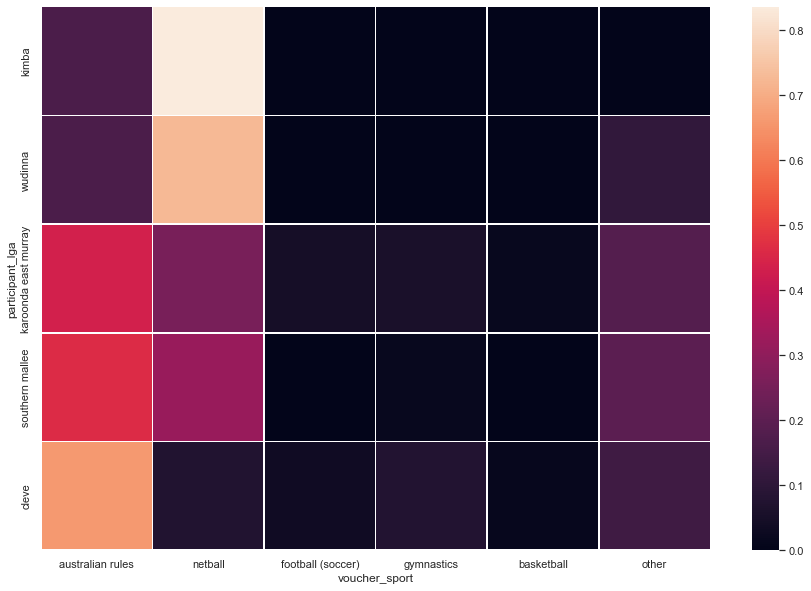

In [94]:
sns.heatmap(data= topClaims5.drop(columns='total').sort_values(by= 'australian rules'), linewidths = 0.5)

In [95]:
topClaims5

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
karoonda east murray,0.435567,0.257732,0.046392,0.056701,0.018041,0.185567,1.0
kimba,0.163793,0.836207,0.000000,0.000000,0.000000,0.000000,1.0
wudinna,0.164794,0.726592,0.000000,0.000000,0.000000,0.108614,1.0
cleve,0.662614,0.072948,0.033435,0.075988,0.015198,0.139818,1.0
southern mallee,0.461988,0.318713,0.002924,0.017544,0.000000,0.198830,1.0


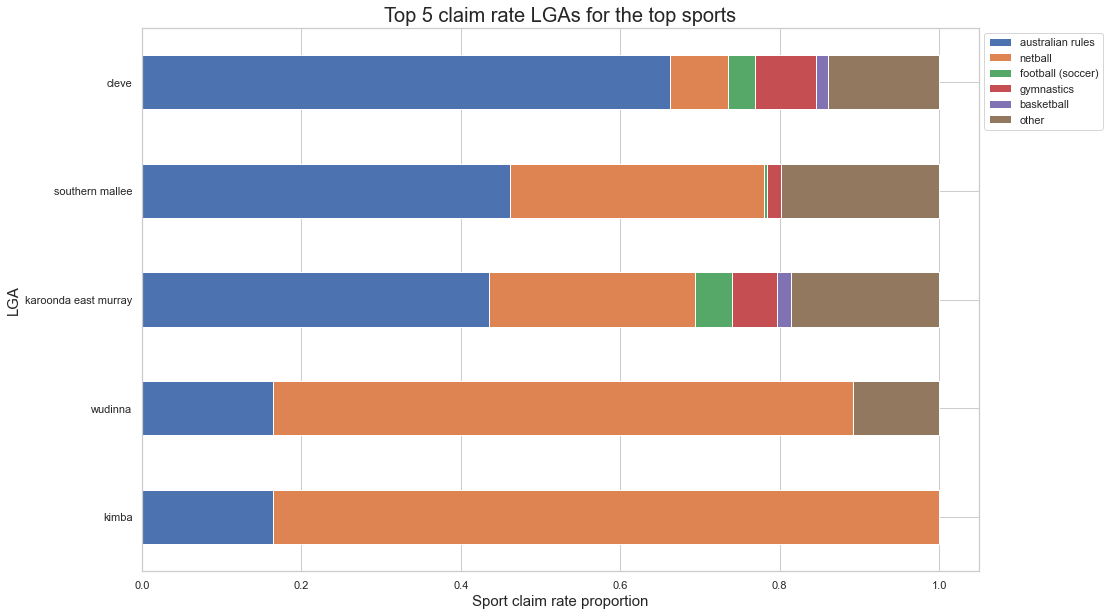

In [96]:
# plt.figure(figsize=(15,10))
plt.rcParams["figure.figsize"] = [15, 10]


topClaims5.drop(columns='total').sort_values(by= 'australian rules').plot.barh(stacked=True)

plt.legend(bbox_to_anchor=(1, 1))

plt.title('Top 5 claim rate LGAs for the top sports', size = 20)
plt.xlabel('Sport claim rate proportion', size = 15)
plt.ylabel('LGA', size=15)

plt.show()

As we saw previously, there is the same pattern as the popularity in one sport decreases, the popularity in the next top sport increases. 

### Top 10 LGAs claim rate for top sports

In [97]:
lgaClaim

,sum,population,proportion,percentage
participant_lga,,,,
adelaide,302.0,19606.0,0.015403,1.54
adelaide hills,4756.0,38601.0,0.123209,12.32
alexandrina,2979.0,23693.0,0.125733,12.57
barossa,2874.0,22174.0,0.129611,12.96
barunga west,333.0,2467.0,0.134982,13.50
...,...,...,...,...
west torrens,2844.0,54932.0,0.051773,5.18
whyalla,2488.0,22070.0,0.112732,11.27
wudinna,267.0,1256.0,0.212580,21.26


In [98]:
topLGAs10 = list(lgaClaim['proportion'].nlargest(10).index)

In [99]:
topClaims10 = saSports[topSports].loc[topLGAs10]

In [100]:
topClaims10

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball
participant_lga,,,,,
karoonda east murray,169.0,100.0,18.0,22.0,7.0
kimba,38.0,194.0,0.0,0.0,0.0
wudinna,44.0,194.0,0.0,0.0,0.0
cleve,218.0,24.0,11.0,25.0,5.0
southern mallee,158.0,109.0,1.0,6.0,0.0
tatiara,310.0,454.0,0.0,0.0,122.0
elliston,105.0,59.0,0.0,1.0,0.0
orroroo/carrieton,53.0,50.0,0.0,8.0,0.0
clare and gilbert valleys,831.0,420.0,8.0,9.0,50.0


In [101]:
topClaims10['other'] = saSports.loc[:, ~saSports.columns.isin(topSports)].sum(axis=1).to_frame()

In [102]:
topClaims10

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other
participant_lga,,,,,,
karoonda east murray,169.0,100.0,18.0,22.0,7.0,72.0
kimba,38.0,194.0,0.0,0.0,0.0,0.0
wudinna,44.0,194.0,0.0,0.0,0.0,29.0
cleve,218.0,24.0,11.0,25.0,5.0,46.0
southern mallee,158.0,109.0,1.0,6.0,0.0,68.0
tatiara,310.0,454.0,0.0,0.0,122.0,162.0
elliston,105.0,59.0,0.0,1.0,0.0,0.0
orroroo/carrieton,53.0,50.0,0.0,8.0,0.0,26.0
clare and gilbert valleys,831.0,420.0,8.0,9.0,50.0,31.0


In [103]:
topClaims10['total'] = topClaims10.sum(axis=1)

In [104]:
topClaims10

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
karoonda east murray,169.0,100.0,18.0,22.0,7.0,72.0,388.0
kimba,38.0,194.0,0.0,0.0,0.0,0.0,232.0
wudinna,44.0,194.0,0.0,0.0,0.0,29.0,267.0
cleve,218.0,24.0,11.0,25.0,5.0,46.0,329.0
southern mallee,158.0,109.0,1.0,6.0,0.0,68.0,342.0
tatiara,310.0,454.0,0.0,0.0,122.0,162.0,1048.0
elliston,105.0,59.0,0.0,1.0,0.0,0.0,165.0
orroroo/carrieton,53.0,50.0,0.0,8.0,0.0,26.0,137.0
clare and gilbert valleys,831.0,420.0,8.0,9.0,50.0,31.0,1349.0


In [105]:
topClaims10 = topClaims10.apply(lambda a: a/topClaims10['total'] )

In [106]:
topClaims10.head()

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
karoonda east murray,0.435567,0.257732,0.046392,0.056701,0.018041,0.185567,1.0
kimba,0.163793,0.836207,0.000000,0.000000,0.000000,0.000000,1.0
wudinna,0.164794,0.726592,0.000000,0.000000,0.000000,0.108614,1.0
cleve,0.662614,0.072948,0.033435,0.075988,0.015198,0.139818,1.0
southern mallee,0.461988,0.318713,0.002924,0.017544,0.000000,0.198830,1.0


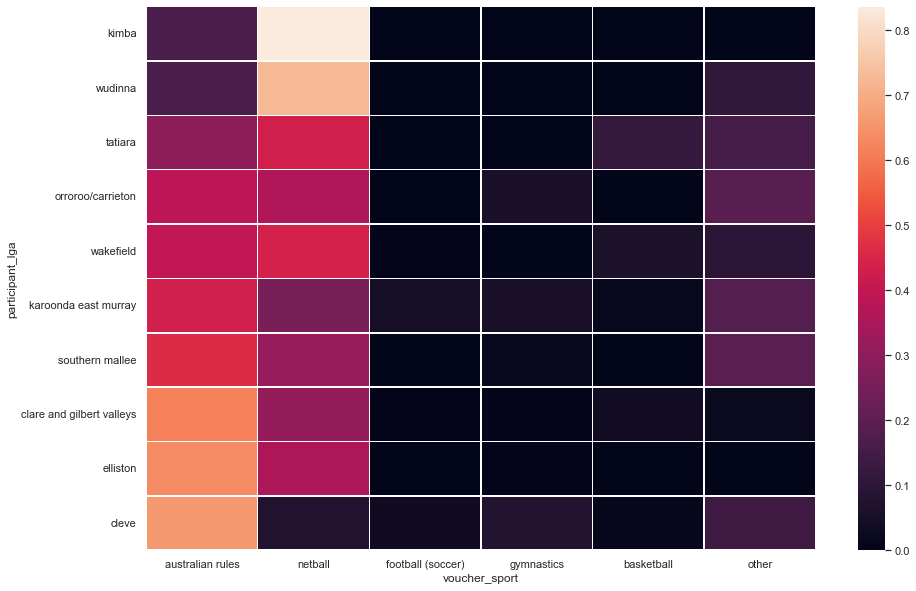

In [107]:
sns.heatmap(data= topClaims10.drop(columns='total').sort_values(by= 'australian rules'), linewidths = 0.5)

In [108]:
topClaims10

voucher_sport,australian rules,netball,football (soccer),gymnastics,basketball,other,total
participant_lga,,,,,,,
karoonda east murray,0.435567,0.257732,0.046392,0.056701,0.018041,0.185567,1.0
kimba,0.163793,0.836207,0.000000,0.000000,0.000000,0.000000,1.0
wudinna,0.164794,0.726592,0.000000,0.000000,0.000000,0.108614,1.0
cleve,0.662614,0.072948,0.033435,0.075988,0.015198,0.139818,1.0
southern mallee,0.461988,0.318713,0.002924,0.017544,0.000000,0.198830,1.0
tatiara,0.295802,0.433206,0.000000,0.000000,0.116412,0.154580,1.0
elliston,0.636364,0.357576,0.000000,0.006061,0.000000,0.000000,1.0
orroroo/carrieton,0.386861,0.364964,0.000000,0.058394,0.000000,0.189781,1.0
clare and gilbert valleys,0.616012,0.311342,0.005930,0.006672,0.037064,0.022980,1.0


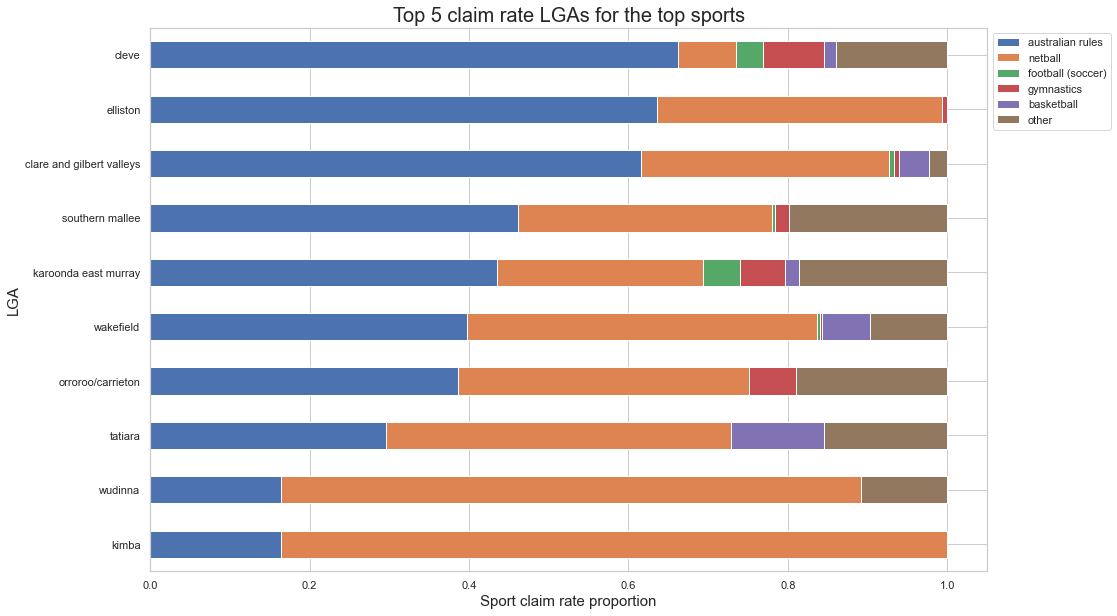

In [109]:
# plt.figure(figsize=(15,10))
plt.rcParams["figure.figsize"] = [15, 10]


topClaims10.drop(columns='total').sort_values(by= 'australian rules').plot.barh(stacked=True)

plt.legend(bbox_to_anchor=(1, 1))

plt.title('Top 5 claim rate LGAs for the top sports', size = 20)
plt.xlabel('Sport claim rate proportion', size = 15)
plt.ylabel('LGA', size=15)

plt.show()

Looks like there is a pattern that as australian rules popularity decreases, netball popularrity increases. 

# Question 3

 Are any LGAs over/under represented in their use of vouchers?

### Getting the proportion of the population that claimed vouchers and showing top5 over and under represented lgas


In [110]:
allSportsClaim = saSports.sum(axis=1).to_frame(name='sum')

In [111]:
allSportsClaim

,sum
participant_lga,
adelaide,302.0
adelaide hills,4756.0
adelaide plains,899.0
alexandrina,2979.0
barossa,2874.0
...,...
west torrens,2844.0
whyalla,2488.0
wudinna,267.0


In [112]:
allSportsClaim['population'] = LGA_scores['population']

We can drop the nan values since they don't have a population value in the SEIFA dataset. 

In [113]:
allSportsClaim = allSportsClaim.dropna()

In [114]:
allSportsClaim['proportion'] = allSportsClaim['sum'] / LGA_scores['population']

<ipython-input-114-4f40c39db565>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allSportsClaim['proportion'] = allSportsClaim['sum'] / LGA_scores['population']


In [115]:
allSportsClaim['percentage'] = round(allSportsClaim['proportion']*100, 2)

<ipython-input-115-eb672521ad09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allSportsClaim['percentage'] = round(allSportsClaim['proportion']*100, 2)


In [116]:
allSportsClaim.sort_values(by= 'percentage', ascending = False)

,sum,population,proportion,percentage
participant_lga,,,,
karoonda east murray,388.0,1035.0,0.374879,37.49
kimba,232.0,1087.0,0.213431,21.34
wudinna,267.0,1256.0,0.212580,21.26
cleve,329.0,1729.0,0.190283,19.03
southern mallee,342.0,2097.0,0.163090,16.31
...,...,...,...,...
campbelltown,2567.0,97060.0,0.026448,2.64
peterborough,45.0,1733.0,0.025967,2.60
coober pedy,39.0,1694.0,0.023022,2.30


We can determine which LGAs are over and under represented by checking the mean rate. We will assume that the LGAs that are above the mean claim rate are over represented and the LGAs below the mean claim rate are under represented. 

In [117]:
meanClaimRate = allSportsClaim['proportion'].sum() / allSportsClaim.shape[0]

In [118]:
overRep = allSportsClaim[allSportsClaim['proportion'] > meanClaimRate]

In [119]:
underRep = allSportsClaim[allSportsClaim['proportion'] < meanClaimRate]

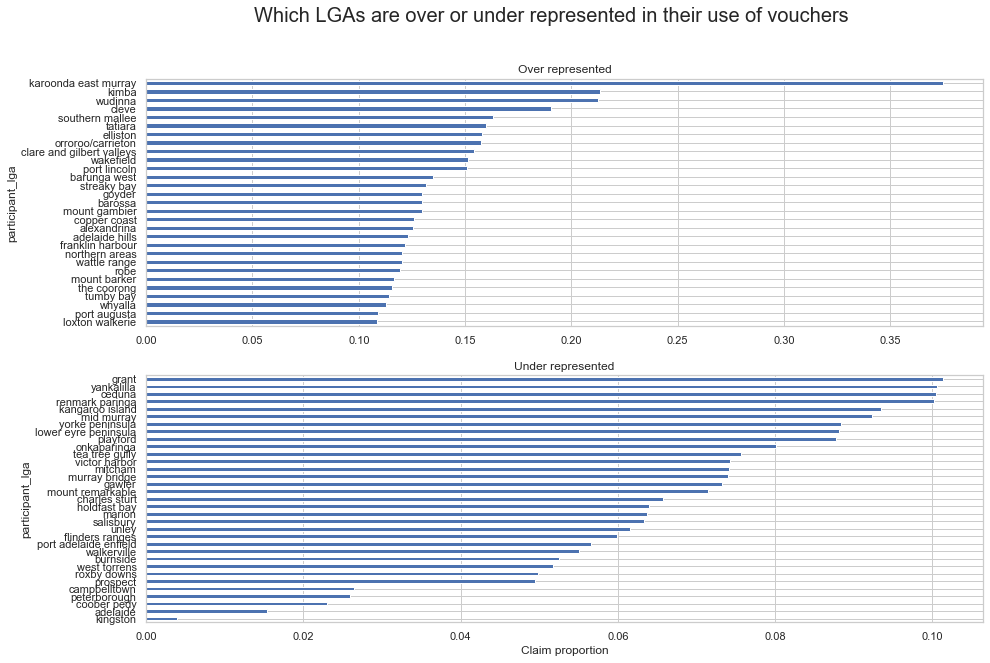

In [120]:
fig, axes = plt.subplots(2,1, figsize=(15,10))

overRep['proportion'].sort_values(ascending=True).plot(kind='barh', ax = axes[0], title='Over represented')
underRep['proportion'].sort_values(ascending=True).plot(kind='barh', ax = axes[1], title='Under represented')

plt.xlabel('Claim proportion')
fig.suptitle('Which LGAs are over or under represented in their use of vouchers', size = 20)

plt.show()

Looks like possible outliers being Karoonda East Murray and Kingston. We've visualised how some LGAs have a low and high voucher use. What could the contributing factors be? I believe this is something we would check with the SEIFA scores which is done in a later question. 

# Question 4

 Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

In [121]:
LGA_scores['ieo']

LGA
adelaide            874.0
adelaide hills     1083.0
albany              999.0
albury              964.0
alexandrina        1000.0
                    ...  
yass valley        1088.0
yilgarn             998.0
york               1010.0
yorke peninsula     969.0
young               964.0
Name: ieo, Length: 556, dtype: float64

In [122]:
allSportsClaim_scores = allSportsClaim

Adding the seifa scores to the DF containing the summary information of the LGAs. Being the sum of the claims in that LGA. 

In [123]:
allSportsClaim_scores['ieo'] = LGA_scores['ieo']
allSportsClaim_scores['ier'] = LGA_scores['ier']
allSportsClaim_scores['irsad'] = LGA_scores['irsad']
allSportsClaim_scores['irsd'] = LGA_scores['irsd']

<ipython-input-123-fa2949d0c4eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allSportsClaim_scores['ieo'] = LGA_scores['ieo']
<ipython-input-123-fa2949d0c4eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allSportsClaim_scores['ier'] = LGA_scores['ier']
<ipython-input-123-fa2949d0c4eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [124]:
allSportsClaim_scores

,sum,population,proportion,percentage,ieo,ier,irsad,irsd
participant_lga,,,,,,,,
adelaide,302.0,19606.0,0.015403,1.54,874.0,874.0,1036.0,1013.0
adelaide hills,4756.0,38601.0,0.123209,12.32,1083.0,1083.0,1077.0,1081.0
alexandrina,2979.0,23693.0,0.125733,12.57,1000.0,1000.0,969.0,987.0
barossa,2874.0,22174.0,0.129611,12.96,1028.0,1028.0,997.0,1017.0
barunga west,333.0,2467.0,0.134982,13.50,981.0,981.0,940.0,954.0
...,...,...,...,...,...,...,...,...
west torrens,2844.0,54932.0,0.051773,5.18,949.0,949.0,989.0,998.0
whyalla,2488.0,22070.0,0.112732,11.27,905.0,905.0,897.0,905.0
wudinna,267.0,1256.0,0.212580,21.26,1008.0,1008.0,999.0,1023.0


Looking at the top 5 LGAs with the highest and lowest respective scores

In [125]:
allSportsClaim_scores.loc[list(allSportsClaim_scores['irsad'].nlargest(5).index)]

,sum,population,proportion,percentage,ieo,ier,irsad,irsd
participant_lga,,,,,,,,
burnside,2213.0,42168.0,0.052481,5.25,1044.0,1044.0,1090.0,1081.0
roxby downs,234.0,4694.0,0.049851,4.99,1066.0,1066.0,1086.0,1096.0
adelaide hills,4756.0,38601.0,0.123209,12.32,1083.0,1083.0,1077.0,1081.0
walkerville,386.0,7008.0,0.055080,5.51,1029.0,1029.0,1076.0,1065.0
unley,2266.0,36813.0,0.061554,6.16,1013.0,1013.0,1071.0,1065.0


In [126]:
allSportsClaim_scores.loc[list(allSportsClaim_scores['irsad'].nsmallest(5).index)]

,sum,population,proportion,percentage,ieo,ier,irsad,irsd
participant_lga,,,,,,,,
peterborough,45.0,1733.0,0.025967,2.60,873.0,873.0,808.0,798.0
playford,6940.0,79082.0,0.087757,8.78,914.0,914.0,868.0,871.0
coober pedy,39.0,1694.0,0.023022,2.30,870.0,870.0,869.0,870.0
murray bridge,1462.0,19742.0,0.074055,7.41,932.0,932.0,887.0,901.0
port augusta,1522.0,13978.0,0.108885,10.89,917.0,917.0,897.0,906.0


When there is more than two columns, it becomes difficult to see if there is a relationship. Let's have a look at a pairplot to quickly see if there is some kind of relationship between the scores and the claims. 

### relation between vouchers claimed and scores via table

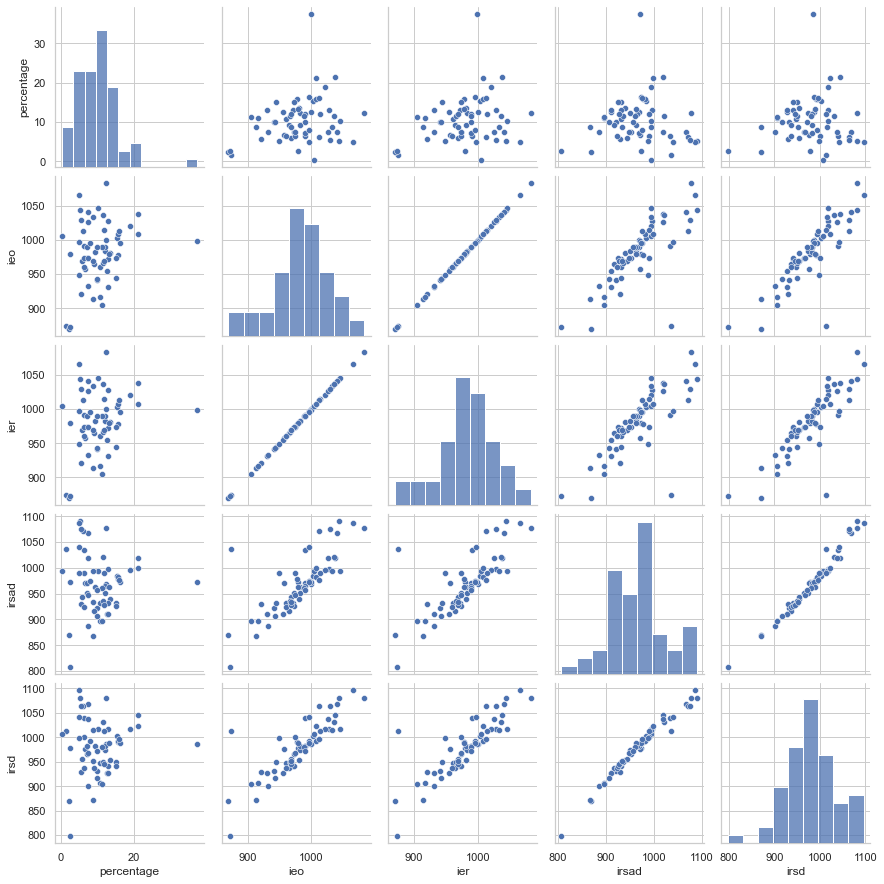

In [127]:
sns.pairplot(allSportsClaim_scores[list(allSportsClaim_scores.columns[-5:])])

Don't really see any relation between claim rate (percentage or proportion) and the scores. We could use a linear regression model to see if there are any relationship between the scores and claim rate. Possibly could even use a logarithmic regression model. 

Checking correlation / heatmap

Dropping the IEO scores because we've noticed IEO = IER. Perhaps there is something wrong with the data because both the scores represent the population differently. One being education and occupation and the other being economic resources. 

In [128]:
set(allSportsClaim_scores['ieo'] == allSportsClaim_scores['ier'])

{True}

In [129]:
scoresList = list(allSportsClaim_scores.columns[-3:])

In [130]:
scoresList.append('proportion')

In [131]:
scoresList

['ier', 'irsad', 'irsd', 'proportion']

plotting the correlation matrix as a heatmap to visually see if there are any correlations between the claim rate and the scores

In [132]:
allSportsClaim_scores[scoresList]

,ier,irsad,irsd,proportion
participant_lga,,,,
adelaide,874.0,1036.0,1013.0,0.015403
adelaide hills,1083.0,1077.0,1081.0,0.123209
alexandrina,1000.0,969.0,987.0,0.125733
barossa,1028.0,997.0,1017.0,0.129611
barunga west,981.0,940.0,954.0,0.134982
...,...,...,...,...
west torrens,949.0,989.0,998.0,0.051773
whyalla,905.0,897.0,905.0,0.112732
wudinna,1008.0,999.0,1023.0,0.212580


In [133]:
allSportsClaim_scores[scoresList].corr()

,ier,irsad,irsd,proportion
ier,1.000000,0.781360,0.848105,0.254972
irsad,0.781360,1.000000,0.985054,-0.026474
irsd,0.848105,0.985054,1.000000,0.064524
proportion,0.254972,-0.026474,0.064524,1.000000


In [134]:
allSportsClaim_scores.corr()

,sum,population,proportion,percentage,ieo,ier,irsad,irsd
sum,1.000000,0.909829,-0.211298,-0.211407,-0.000399,-0.000399,0.044818,0.026067
population,0.909829,1.000000,-0.389840,-0.389941,-0.035736,-0.035736,0.092233,0.055094
proportion,-0.211298,-0.389840,1.000000,1.000000,0.254972,0.254972,-0.026474,0.064524
percentage,-0.211407,-0.389941,1.000000,1.000000,0.254995,0.254995,-0.026467,0.064529
ieo,-0.000399,-0.035736,0.254972,0.254995,1.000000,1.000000,0.781360,0.848105
ier,-0.000399,-0.035736,0.254972,0.254995,1.000000,1.000000,0.781360,0.848105
irsad,0.044818,0.092233,-0.026474,-0.026467,0.781360,0.781360,1.000000,0.985054
irsd,0.026067,0.055094,0.064524,0.064529,0.848105,0.848105,0.985054,1.000000


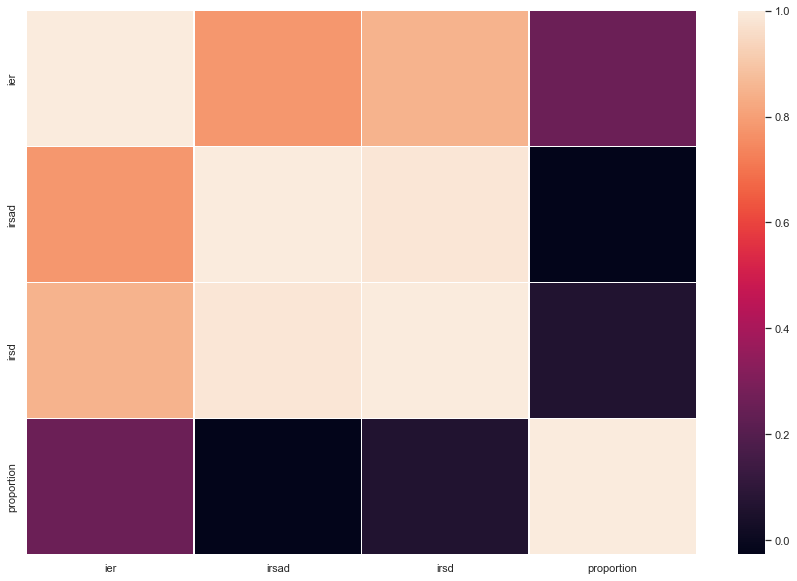

In [135]:
sns.heatmap((allSportsClaim_scores[scoresList].corr()), linewidths = 0.5)

checking the proportion row and the scores, we can't really see a relationship. 

Can try to explore it, checking the differences between pearson and spearman correlation. Can also try to use machine learning to find correlation, check correlation matrix. 

Checking the pearsons and spearman's correlation:
- measure of skewness.
- pearson : 0 does not necessarily mean the variables are not correlated. 
- spearman : when the data contains outliers, use spearmans rank correlation. This will use the ranks of the data rather than the actual values. 

### Using LR to find a relationship

In [136]:
allSportsClaim_scores.nlargest(1, columns= 'proportion')

,sum,population,proportion,percentage,ieo,ier,irsad,irsd
participant_lga,,,,,,,,
karoonda east murray,388.0,1035.0,0.374879,37.49,999.0,999.0,972.0,986.0


# Challenge Question: Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

### setting up the DFs

In [137]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [138]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RCS]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,ieo,ier,irsad,irsd,population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,NaN,NaN,NaN,NaN,NaN
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,NaN,NaN,NaN,NaN,NaN
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,NaN,NaN,NaN,NaN,NaN
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,NaN,NaN,NaN,NaN,NaN
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,NaN,NaN,NaN,NaN,NaN


In [139]:
qld_vouchers_scores = qld_vouchers_scores.rename(columns = {'Participation Activity':'sport'})

In [140]:
qld_vouchers_scores['sport'] = qld_vouchers_scores['sport'].str.lower()
qld_vouchers_scores['LGA'] = qld_vouchers_scores['LGA'].str.lower()

qld_vouchers_scores.columns  = qld_vouchers_scores.columns.str.lower()

In [141]:
qldGroup = (qld_vouchers_scores.groupby(['lga','sport']).count()).copy(deep=True)

In [142]:
qldGroup.head()

application number  voucher number  \
lga            sport                                                   
banana         equestrian                          1               1   
               football (soccer)                   1               1   
               netball                             1               1   
blackall tambo athletics                           2               2   
               rugby league                        1               1   

                                  child age (at time of application)  gender  \
lga            sport                                                           
banana         equestrian                                          1       0   
               football (soccer)                                   1       0   
               netball                                             1       0   
blackall tambo athletics                                           2       0   
               rugby league                                        1       0   

                                  has your child played sport before?  \
lga            sport                                                    
banana         equestrian                                           1   
               football (soccer)                                    1   
               netball                                              1   
blackall tambo athletics                                            2   
               rugby league                                         1   

                                  club name  club suburb/town  \
lga            sport                                            
banana         equestrian                 1                 1   
               football (soccer)          1                 1   
               netball                    1                 1   
blackall tambo athletics                  2                 2   
               rugby league               1                 1   

                                  club local government area name  \
lga            sport                                                
banana         equestrian                                       1   
               football (soccer)                                1   
               netball                                          1   
blackall tambo athletics                                        2   
               rugby league                                     1   

                                  club state electoral district  name  \
lga            sport                                                    
banana         equestrian                                           1   
               football (soccer)                                    1   
               netball                                              1   
blackall tambo athletics                                            2   
               rugby league                                         1   

                                  parent suburb/town  total payment  ieo  ier  \
lga            sport                                                            
banana         equestrian                          1              1    0    0   
               football (soccer)                   1              1    0    0   
               netball                             1              1    0    0   
blackall tambo athletics                           2              2    0    0   
               rugby league                        1              1    0    0   

                                  irsad  irsd  population  
lga            sport                                       
banana         equestrian             0     0           0  
               football (soccer)      0     0           0  
               netball                0     0           0  
blackall tambo athletics              0     0           0  
               rugby league           0     0           0

In [143]:
qldSports = pd.pivot_table(qldGroup, values = 'voucher number', index = 'lga', columns = 'sport')

In [144]:
qldSports = qldSports.fillna(0)

### matching the sport names to those in SA

There are a different number of sports in both states

In [145]:
print(f'Number of sports in QLD: {len(qldSports)}')

Number of sports in QLD: 45


In [146]:
print(f'Number of sports in SA: {len(saSports)}')

Number of sports in SA: 69


I want to find out which sports are the same. 

In [147]:
sameSports = [] 

for val in list(qldSports.columns):
    if val in list(saSports.columns):
        sameSports.append(val)

print(f' There are {len(sameSports)} common sports in both states')

 There are 32 common sports in both states


Checking what sports are different in QLD and SA


In [148]:
saSports.columns[~saSports.columns.isin(sameSports)]

Index(['australian rules', 'bmx', 'badminton', 'bowls', 'diving', 'fencing',
       'kung fu (wu shu)', 'lacrosse', 'motor sport', 'motorcycling',
       'orienteering', 'paralympics', 'pony clubs', 'surf lifesaving',
       'surf riding', 'volleyball', 'water polo', 'wrestling'],
      dtype='object', name='voucher_sport')

In [149]:
qldSports.columns[~qldSports.columns.isin(list(set(saSports.columns)))]

Index(['*other', 'australian football', 'bmx bicycle motocross',
       'body boarding', 'bowls lawn', 'boxing', 'broomball', 'bushwalking',
       'canoeing outrigger', 'cheerleading', 'disability sports',
       'dragon boating', 'futsal', 'ice hockey', 'inline hockey', 'karting',
       'kayaking', 'life saving surf', 'mixed martial arts', 'motor cycling',
       'oztag', 'parkour', 'polocrosse', 'pony club',
       'riding for the disabled', 'rock climbing', 'skipping', 'surfing',
       'swimming synchronised', 't-ball', 'tenpin bowling',
       'trail bike riding', 'trampolining', 'zen do kai martial arts'],
      dtype='object', name='sport')

We can see there are a few common sports that still remain but they are spelled differently. We will have to fix those manually. 

Renaming the columns that are different in the DFs 

In [150]:
qldSports = qldSports.rename(columns= {'australian football' : 'australian rules', 'bmx bicycle motocross': 'bmx',
                                      'bowls lawn': 'bowls', 'disability sports': 'paralympics', 'motor cycling': 'motorcycling',
                                      'pony club': 'pony clubs', 'surfing':'surf riding'})

Now that we've renamed the columns, can find the similar columns with the loop again. 

In [151]:
sameSports2 = [] 

for val in list(qldSports.columns):
#     print(val)
    if val in list(saSports.columns):
#         print(val)
        sameSports2.append(val)

print(f' There are {len(sameSports2)} common sports in both states')

 There are 39 common sports in both states


now we have the columns with same sports, we want to save those columns in the DF and put the rest of the uncommon sports as 'other'

In [152]:
qld_otherSportsList = qldSports.columns[~qldSports.columns.isin(sameSports2)]

In [153]:
qldSports[qld_otherSportsList].sum(axis=1).to_frame(name='other').head()

,other
lga,
banana,0.0
blackall tambo,0.0
brisbane,173.0
bundaberg,0.0
burdekin,0.0


In [154]:
qldSportsClean = qldSports[sameSports2]

In [155]:
qldSportsClean['other']= qldSports[qld_otherSportsList].sum(axis=1).to_frame()

<ipython-input-155-41933e62262e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qldSportsClean['other']= qldSports[qld_otherSportsList].sum(axis=1).to_frame()


In [156]:
qldSportsClean.head()

sport,archery,athletics,australian rules,baseball,basketball,bmx,bowls,calisthenics,cricket,cycling,...,softball,squash,surf riding,swimming,table tennis,taekwondo,tennis,touch,weightlifting,other
lga,,,,,,,,,,,,,,,,,,,,,
banana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
blackall tambo,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brisbane,0.0,1.0,68.0,3.0,78.0,5.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,48.0,0.0,5.0,5.0,0.0,0.0,173.0
bundaberg,0.0,3.0,3.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
burdekin,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
len(qldSportsClean.columns)

40

In [158]:
len(saSports.columns)

50

In [159]:
sa_otherSportsList = saSports.columns[~saSports.columns.isin(sameSports2)]

In [160]:
saSportsClean = saSports[sameSports2]

In [161]:
saSportsClean['other']= saSports[sa_otherSportsList].sum(axis=1).to_frame()

<ipython-input-161-d9f6177f121b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saSportsClean['other']= saSports[sa_otherSportsList].sum(axis=1).to_frame()


In [162]:
saSportsClean.head()

voucher_sport,archery,athletics,australian rules,baseball,basketball,bmx,bowls,calisthenics,cricket,cycling,...,softball,squash,surf riding,swimming,table tennis,taekwondo,tennis,touch,weightlifting,other
participant_lga,,,,,,,,,,,,,,,,,,,,,
adelaide,0.0,16.0,130.0,1.0,4.0,0.0,0.0,1.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,11.0,4.0,0.0,0.0,36.0
adelaide hills,3.0,204.0,1412.0,11.0,48.0,2.0,0.0,62.0,128.0,1.0,...,27.0,0.0,0.0,18.0,3.0,44.0,257.0,2.0,0.0,38.0
adelaide plains,0.0,3.0,485.0,3.0,15.0,0.0,0.0,23.0,3.0,2.0,...,6.0,0.0,0.0,3.0,0.0,0.0,13.0,0.0,0.0,5.0
alexandrina,9.0,62.0,980.0,0.0,204.0,4.0,0.0,5.0,8.0,0.0,...,24.0,0.0,2.0,11.0,0.0,0.0,109.0,0.0,0.0,40.0
barossa,0.0,158.0,1196.0,6.0,341.0,3.0,0.0,9.0,56.0,0.0,...,3.0,0.0,0.0,12.0,0.0,0.0,83.0,0.0,0.0,1.0


now there are the exact same sports in both states. We have finished setting up the DFs. 

### Checking the top sports and top LGAs for both states

We know the top sports and LGAs for SA being in `topSports` and `topLGAs`, we need to perform the same process for QLD.

In [163]:
claimDF_qldLGAs = qldSportsClean.sum(axis=1).to_frame(name='sum')

In [164]:
claimDF_qldLGAs['claim proportion'] = claimDF_qldLGAs['sum'] / claimDF_qldLGAs['sum'].sum()

In [165]:
claimDF_qldLGAs['population'] = LGA_scores['population']

In [166]:
claimDF_qldLGAs = claimDF_qldLGAs.dropna()

In [167]:
claimDF_qldLGAs['pop proportion'] = claimDF_qldLGAs['sum'] / claimDF_qldLGAs['population']

In [168]:
claimDF_qldLGAs = claimDF_qldLGAs.sort_values(by='claim proportion')

Checking the claim rates proportions by the population provides too small of figures. We only see claim rates of up to 1.6% of the entire population for that LGA.


In [169]:
claimDF_qldSports= qldSportsClean.sum().to_frame(name='sum')
claimDF_qldSports['claim proportion'] = claimDF_qldSports['sum'] / claimDF_qldSports['sum'].sum()

In [170]:
claimDF_qldSports = claimDF_qldSports.sort_values(by='claim proportion')

In [171]:
topSports_qld = list(claimDF_qldSports['claim proportion'].nlargest(5).index)

In [172]:
botSports_qld = list(claimDF_qldSports['claim proportion'].nsmallest(5).index)

In [173]:
topLGAs_qld = list(claimDF_qldLGAs['claim proportion'].nlargest(5).index)

In [174]:
botLGAs_qld = list(claimDF_qldLGAs['claim proportion'].nsmallest(5).index)

### comparing the topSports_qld and topSports

In [175]:
claimDF = claimDF.rename(columns={'proportion':'claim proportion'})

In [176]:
claimDF_qldSports.loc[topSports]

,sum,claim proportion
sport,,
australian rules,548.0,0.057642
netball,1263.0,0.132849
football (soccer),2074.0,0.218155
gymnastics,539.0,0.056695
basketball,376.0,0.039550


In [177]:
claimDF_qldSports.loc[topSports_qld]

,sum,claim proportion
sport,,
rugby league,2782.0,0.292626
football (soccer),2074.0,0.218155
netball,1263.0,0.132849
australian rules,548.0,0.057642
gymnastics,539.0,0.056695


In [178]:
claimDF.loc[topSports]['claim proportion'].sort_values()

voucher_sport
basketball           0.047175
gymnastics           0.077027
football (soccer)    0.123700
netball              0.188330
australian rules     0.370309
Name: claim proportion, dtype: float64

In [179]:
claimDF.loc[topSports_qld]['claim proportion'].sort_values()

voucher_sport
rugby league         0.002117
gymnastics           0.077027
football (soccer)    0.123700
netball              0.188330
australian rules     0.370309
Name: claim proportion, dtype: float64

In [180]:
claimDF_qldSports.loc[topSports_qld]['claim proportion'].sort_values()

sport
gymnastics           0.056695
australian rules     0.057642
netball              0.132849
football (soccer)    0.218155
rugby league         0.292626
Name: claim proportion, dtype: float64

In [181]:
claimDF_qldSports.loc[topSports]['claim proportion'].sort_values()

sport
basketball           0.039550
gymnastics           0.056695
australian rules     0.057642
netball              0.132849
football (soccer)    0.218155
Name: claim proportion, dtype: float64

Text(0.5, 0.98, 'Comparing the top sports in both states')

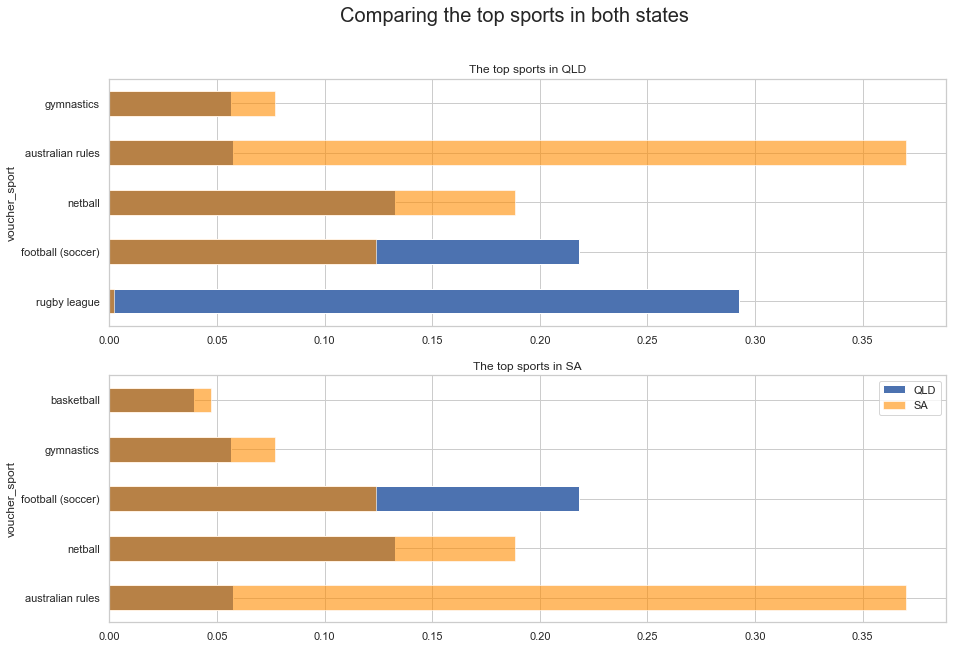

In [182]:
fig, axes = plt.subplots(2,1)

claimDF_qldSports.loc[topSports_qld]['claim proportion'].plot(kind='barh', label='QLD', ax = axes[0])
claimDF.loc[topSports_qld]['claim proportion'].plot(kind='barh', color='darkorange', alpha=0.6, label='SA',
                                                                 ax = axes[0], title='The top sports in QLD')

claimDF_qldSports.loc[topSports]['claim proportion'].plot(kind='barh', label='QLD',ax = axes[1], title='The top sports in SA')
claimDF.loc[topSports]['claim proportion'].plot(kind='barh', color='darkorange', alpha=0.6, label='SA', ax = axes[1])


plt.legend()
plt.suptitle('Comparing the top sports in both states', size=20)

### trying to show topLGAs side by side, different colors for the states to show how the topLGAs compare in proportion

In [198]:
claimDF_qldLGAs.loc[topLGAs_qld]

,sum,claim proportion,population,pop proportion
lga,,,,
gold coast,1700.0,0.178816,494591.0,0.003437
brisbane,1425.0,0.149890,1042074.0,0.001367
sunshine coast,974.0,0.102451,306889.0,0.003174
moreton bay,938.0,0.098664,377992.0,0.002482
logan,805.0,0.084674,278080.0,0.002895


In [205]:
test = lgaClaim.loc[topLGAs].drop(columns = 'percentage').rename(columns = {'proportion': 'claim proportion'})

In [208]:
test2 = claimDF_qldLGAs.loc[topLGAs_qld].drop(columns='pop proportion')

In [210]:
test = test[['sum','claim proportion','population']]

In [216]:
test['state'] = 'sa'

<ipython-input-216-6ac5f09ee2b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['state'] = 'sa'


In [215]:
test2['state']= 'qld'

In [219]:
test = test.append(test2)

In [221]:
test

,sum,claim proportion,population,state
karoonda east murray,388.0,0.374879,1035.0,sa
kimba,232.0,0.213431,1087.0,sa
wudinna,267.0,0.212580,1256.0,sa
cleve,329.0,0.190283,1729.0,sa
southern mallee,342.0,0.163090,2097.0,sa
gold coast,1700.0,0.178816,494591.0,qld
brisbane,1425.0,0.149890,1042074.0,qld
sunshine coast,974.0,0.102451,306889.0,qld
moreton bay,938.0,0.098664,377992.0,qld
logan,805.0,0.084674,278080.0,qld


In [231]:
list(test.index)

['karoonda east murray',
 'kimba',
 'wudinna',
 'cleve',
 'southern mallee',
 'gold coast',
 'brisbane',
 'sunshine coast',
 'moreton bay',
 'logan']

C:\Users\Rudol\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


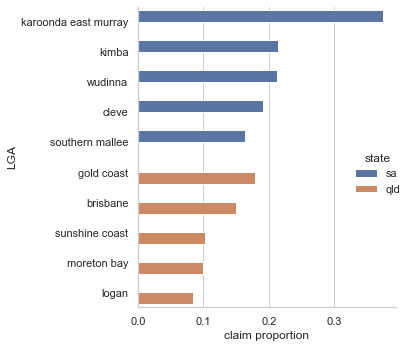

In [235]:
sns.catplot(data = test, x = 'claim proportion', kind = 'bar', y= list(test.index) , hue = 'state')

plt.ylabel('LGA')


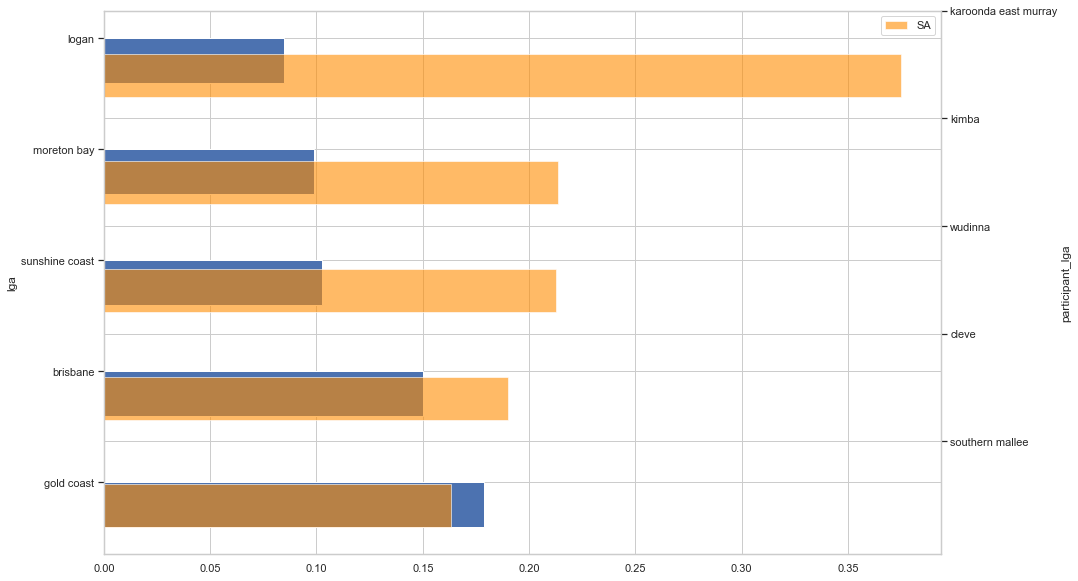

In [195]:
# fig, axes = plt.subplots(1,1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

width = 0.4

claimDF_qldLGAs.loc[topLGAs_qld]['claim proportion'].plot(kind='barh', label='QLD', ax=ax1, position = 1, width = width)
lgaClaim.loc[topLGAs]['proportion'].sort_values().plot(kind='barh', color='darkorange', alpha=0.6, label='SA', ax=ax2, position = 2, width = width)

# claimDF_qldLGAs.loc[topSports]['claim proportion'].plot(kind='barh', label='QLD',ax = axes[1])
# topLGAsClaim.loc[topSports]['claim proportion'].sort_values().plot(kind='barh', color='darkorange', alpha=0.6, label='SA', ax = axes[1])


plt.legend()

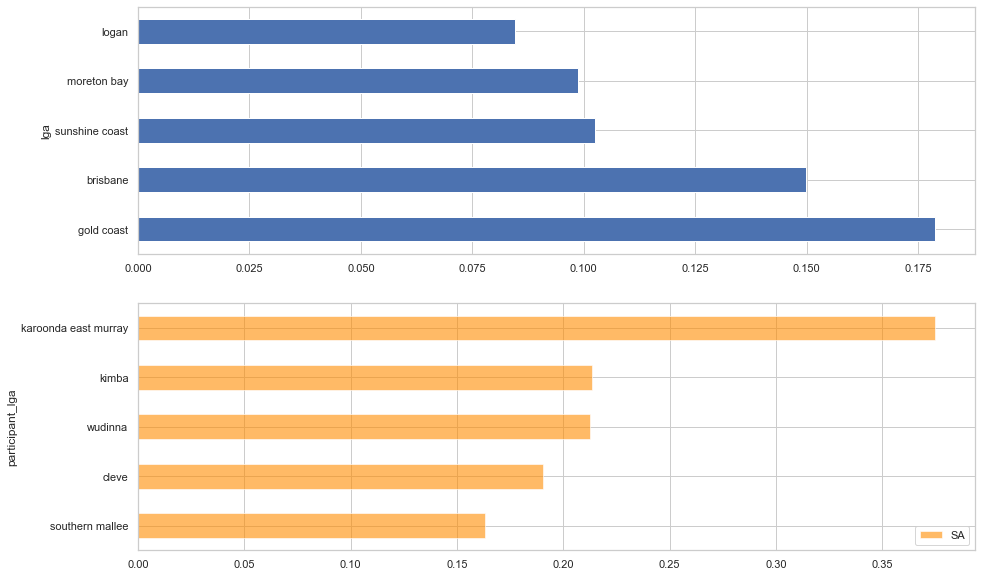

In [189]:
fig, axes = plt.subplots(2,1)

claimDF_qldLGAs.loc[topLGAs_qld]['claim proportion'].plot(kind='barh', label='QLD',ax=axes[0])
lgaClaim.loc[topLGAs]['proportion'].sort_values().plot(kind='barh', color='darkorange', alpha=0.6, label='SA')

# claimDF_qldLGAs.loc[topSports]['claim proportion'].plot(kind='barh', label='QLD',ax = axes[1])
# topLGAsClaim.loc[topSports]['claim proportion'].sort_values().plot(kind='barh', color='darkorange', alpha=0.6, label='SA', ax = axes[1])


plt.legend()